In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys
from sklearn.metrics import classification_report, confusion_matrix
from collections import deque
from sklearn.linear_model import LinearRegression


In [27]:
data = pd.read_csv("datos.csv",  sep = ',')
data = data.drop(columns=['frame'])
data.head()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis,labels
0,0.504313,0.374600,-0.161631,0.999962,0.514392,0.373008,-0.154843,0.999938,0.517940,0.376536,...,0.901502,0.420774,0.712442,-0.137218,0.893193,0.364911,0.650783,-0.142738,0.906649,['walking_to_camera']
1,0.505099,0.374492,-0.039187,0.999951,0.515289,0.372998,-0.034026,0.999919,0.518262,0.376534,...,0.897006,0.480845,0.672524,-0.230077,0.890972,0.373060,0.617001,-0.171139,0.896794,['walking_to_camera']
2,0.505067,0.374491,-0.062064,0.999950,0.515690,0.373596,-0.049927,0.999910,0.518328,0.377474,...,0.898330,0.464089,0.812319,-0.383315,0.894135,0.396686,0.773695,-0.335974,0.894761,['walking_to_camera']
3,0.505060,0.374496,-0.089032,0.999904,0.515604,0.373385,-0.082102,0.999777,0.518191,0.377127,...,0.887482,0.454433,0.787702,-0.291903,0.881608,0.413903,0.711325,-0.241964,0.867268,['walking_to_camera']
4,0.505049,0.374448,-0.103178,0.999894,0.515320,0.373358,-0.086771,0.999759,0.517954,0.377057,...,0.867021,0.500646,0.740875,-0.203028,0.869768,0.411382,0.668761,-0.176965,0.839642,['walking_to_camera']


In [28]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,...,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000
mean,0.500240,0.337177,-0.218270,0.999076,0.505335,0.325643,-0.219570,0.998905,0.508409,0.325535,...,0.208467,0.840901,0.521656,0.817754,0.095782,0.881470,0.460858,0.817460,0.091271,0.877886
std,0.066088,0.099204,0.278943,0.007558,0.066207,0.100565,0.253229,0.007997,0.067221,0.100575,...,0.295404,0.110666,0.087740,0.140562,0.301523,0.123075,0.077989,0.140232,0.321110,0.135071
min,0.036065,0.068799,-1.250967,0.806409,0.044960,0.048046,-1.236800,0.798544,0.047116,0.047736,...,-0.714976,0.083035,0.044957,0.443062,-0.851458,0.040267,0.036693,0.436800,-0.949595,0.056264
25%,0.471591,0.282103,-0.426825,0.999708,0.473222,0.272019,-0.404776,0.999595,0.473471,0.271693,...,0.116328,0.793262,0.468401,0.680901,0.018055,0.828025,0.408820,0.679519,-0.003143,0.813679
50%,0.501296,0.330070,-0.305894,0.999918,0.508416,0.318069,-0.292129,0.999853,0.511677,0.317831,...,0.231479,0.860225,0.523627,0.862832,0.126857,0.932336,0.467057,0.862556,0.122031,0.942485
75%,0.529419,0.382023,0.021897,0.999975,0.539123,0.371393,0.002115,0.999938,0.544987,0.371564,...,0.360728,0.918484,0.590221,0.920570,0.240865,0.966752,0.500189,0.925479,0.247502,0.972199
max,0.897141,0.847356,0.736383,0.999999,0.900005,0.835987,0.719173,0.999997,0.904192,0.834645,...,1.141757,0.997456,0.886157,1.935614,1.058763,0.991196,0.864255,1.895901,1.098083,0.992185


In [29]:
#Theonly None valus ar the labels
data.dropna(inplace=True)


In [30]:
data.replace(np.nan, "unknown", inplace=True)

In [31]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,...,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000,12014.000000
mean,0.500916,0.335135,-0.204852,0.998785,0.505529,0.323879,-0.207629,0.998566,0.508327,0.323744,...,0.222723,0.842393,0.519621,0.807321,0.116434,0.877914,0.465969,0.807653,0.109899,0.873858
std,0.067745,0.094376,0.279653,0.009195,0.067663,0.095551,0.254598,0.009730,0.068559,0.095536,...,0.283987,0.105974,0.086741,0.136905,0.288529,0.113426,0.080746,0.136963,0.306075,0.129218
min,0.036065,0.068799,-1.236279,0.806409,0.044960,0.048046,-1.217309,0.798544,0.047116,0.047736,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.471558,0.279863,-0.418856,0.999675,0.472722,0.270073,-0.398921,0.999543,0.472931,0.270206,...,0.124808,0.793294,0.469036,0.674467,0.036232,0.820222,0.417617,0.672762,0.013688,0.806944
50%,0.499669,0.325658,-0.269337,0.999903,0.504396,0.313575,-0.264170,0.999834,0.508043,0.313413,...,0.230356,0.860395,0.518810,0.850823,0.135266,0.919541,0.472636,0.848020,0.124031,0.931997
75%,0.528118,0.376944,0.047959,0.999968,0.537157,0.365815,0.030516,0.999926,0.543469,0.365645,...,0.359261,0.918413,0.583761,0.916188,0.248228,0.964109,0.504588,0.921611,0.252027,0.970169
max,0.897141,0.658496,0.736383,0.999999,0.900005,0.639512,0.719173,0.999997,0.904192,0.639108,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.991196,0.864255,1.221757,1.098083,0.992185


In [32]:
data['labels'].unique()

array(["['walking_to_camera']", "['walking_away']", "['spinning']",
       "['walking_left_to_right']", "['walking_right_to_left']",
       "['spinning', 'siting_down']", "['standing_up']",
       "['walking_away', 'spinning']", "['siting_down']",
       "['walking_to_camera', 'walking_away']",
       "['walking_to_camera', 'spinning']"], dtype=object)

In [33]:
data = data[~data['labels'].isin(["['walking_right_to_left']", "['walking_left_to_right']"])]
data.reset_index(drop=True, inplace=True)

In [34]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,...,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000,11856.000000
mean,0.500630,0.337261,-0.205684,0.998786,0.505281,0.326075,-0.208435,0.998564,0.508107,0.325937,...,0.222780,0.843278,0.519636,0.804970,0.115899,0.877960,0.465511,0.805359,0.109188,0.874602
std,0.062202,0.093154,0.281240,0.009253,0.062129,0.094238,0.255994,0.009792,0.063113,0.094228,...,0.285546,0.104408,0.082991,0.136047,0.289907,0.113852,0.076664,0.136348,0.307664,0.128028
min,0.036065,0.068799,-1.236279,0.806409,0.044960,0.048046,-1.217309,0.798544,0.047116,0.047736,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.471829,0.283062,-0.420075,0.999675,0.473092,0.272873,-0.400383,0.999548,0.473337,0.272785,...,0.125196,0.794204,0.469571,0.673442,0.035709,0.819555,0.417996,0.671860,0.012498,0.807006
50%,0.499628,0.327222,-0.279104,0.999905,0.504332,0.314994,-0.269903,0.999836,0.507962,0.314688,...,0.230509,0.860629,0.518862,0.847585,0.135266,0.920372,0.472569,0.845614,0.123689,0.932417
75%,0.527708,0.377771,0.049691,0.999968,0.536767,0.366244,0.031794,0.999926,0.543091,0.366094,...,0.360122,0.917881,0.582964,0.914810,0.247483,0.964480,0.504023,0.919897,0.250839,0.970116
max,0.897141,0.658496,0.736383,0.999999,0.900005,0.639512,0.719173,0.999997,0.904192,0.639108,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.991196,0.863166,1.221757,1.098083,0.992185


In [35]:
data = data[data['labels'].str.len() <= 21]
data.reset_index(drop=True, inplace=True)

In [36]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,...,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000
mean,0.501543,0.338072,-0.213232,0.998744,0.506399,0.326800,-0.215147,0.998516,0.509371,0.326659,...,0.220537,0.841735,0.522133,0.808804,0.111452,0.880914,0.465049,0.809276,0.104584,0.877300
std,0.062997,0.093063,0.275539,0.009452,0.062880,0.094155,0.250787,0.010002,0.063842,0.094149,...,0.290075,0.103813,0.083534,0.135101,0.293439,0.110277,0.077681,0.135308,0.312081,0.126407
min,0.036065,0.068799,-1.236279,0.806409,0.044960,0.048046,-1.217309,0.798544,0.047116,0.047736,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.472577,0.282903,-0.420097,0.999672,0.474031,0.272794,-0.400386,0.999544,0.474770,0.272633,...,0.121147,0.794138,0.473376,0.675214,0.030920,0.823551,0.417104,0.675551,0.008512,0.811342
50%,0.500942,0.325927,-0.291028,0.999904,0.507107,0.313676,-0.278557,0.999834,0.510328,0.313528,...,0.229669,0.859825,0.521953,0.853207,0.132377,0.923857,0.471238,0.852086,0.119741,0.935263
75%,0.528454,0.378448,0.029819,0.999969,0.537690,0.366701,0.014425,0.999927,0.544064,0.366450,...,0.361613,0.916214,0.585807,0.915888,0.246273,0.964779,0.503654,0.921110,0.247594,0.970654
max,0.897141,0.648112,0.736383,0.999999,0.900005,0.631986,0.719173,0.999997,0.904192,0.629887,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.989672,0.863166,1.221757,1.098083,0.992185


In [37]:
face_landmarks = [f'landmark_{i}' for i in range(1,11)]
full_face_landmarks = [f'landmark_{i}_x' for i in range(1,11)] + [f'landmark_{i}_y' for i in range(1,11)] + [f'landmark_{i}_z' for i in range(1,11)] + [f'landmark_{i}_vis' for i in range(1,11)]

data = data.drop(columns=full_face_landmarks)
data.describe()


,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,...,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000
mean,0.501543,0.338072,-0.213232,0.998744,0.531375,0.397362,-0.130742,0.999785,0.471226,0.396693,...,0.220537,0.841735,0.522133,0.808804,0.111452,0.880914,0.465049,0.809276,0.104584,0.877300
std,0.062997,0.093063,0.275539,0.009452,0.099533,0.083010,0.148883,0.000525,0.089718,0.081883,...,0.290075,0.103813,0.083534,0.135101,0.293439,0.110277,0.077681,0.135308,0.312081,0.126407
min,0.036065,0.068799,-1.236279,0.806409,0.079105,0.135696,-0.782008,0.980707,0.005822,0.131450,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.472577,0.282903,-0.420097,0.999672,0.466071,0.345001,-0.179972,0.999789,0.412728,0.345866,...,0.121147,0.794138,0.473376,0.675214,0.030920,0.823551,0.417104,0.675551,0.008512,0.811342
50%,0.500942,0.325927,-0.291028,0.999904,0.534256,0.389443,-0.104012,0.999908,0.469380,0.388810,...,0.229669,0.859825,0.521953,0.853207,0.132377,0.923857,0.471238,0.852086,0.119741,0.935263
75%,0.528454,0.378448,0.029819,0.999969,0.607197,0.441096,-0.047154,0.999946,0.516626,0.439280,...,0.361613,0.916214,0.585807,0.915888,0.246273,0.964779,0.503654,0.921110,0.247594,0.970654
max,0.897141,0.648112,0.736383,0.999999,0.943683,0.653046,0.404642,0.999988,0.875112,0.655759,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.989672,0.863166,1.221757,1.098083,0.992185


In [38]:
distance_soulders = np.sqrt((data['landmark_11_x'] - data['landmark_12_x'])**2 + (data['landmark_11_y'] - data['landmark_12_y'])**2 + (data['landmark_11_z'] - data['landmark_12_z'])**2)
data['distance_soulders'] = distance_soulders

In [39]:
handsLandmarks = [f'landmark_{i}' for i in range(17, 23)]
full_hands_landmarks = [f'landmark_{i}_x' for i in range(17, 23)] + [f'landmark_{i}_y' for i in range(17, 23)] + [f'landmark_{i}_z' for i in range(17, 23)] + [f'landmark_{i}_vis' for i in range(17, 23)]
data.drop(columns=full_hands_landmarks, inplace=True)
data.head()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis,labels,distance_soulders
0,0.504313,0.374600,-0.161631,0.999962,0.529732,0.441457,-0.075995,0.999981,0.476124,0.392510,...,0.420774,0.712442,-0.137218,0.893193,0.364911,0.650783,-0.142738,0.906649,['walking_to_camera'],0.111485
1,0.505099,0.374492,-0.039187,0.999951,0.531177,0.438222,-0.010966,0.999982,0.475840,0.392780,...,0.480845,0.672524,-0.230077,0.890972,0.373060,0.617001,-0.171139,0.896794,['walking_to_camera'],0.106029
2,0.505067,0.374491,-0.062064,0.999950,0.534029,0.438386,0.015689,0.999981,0.466446,0.396971,...,0.464089,0.812319,-0.383315,0.894135,0.396686,0.773695,-0.335974,0.894761,['walking_to_camera'],0.097261
3,0.505060,0.374496,-0.089032,0.999904,0.534113,0.431799,-0.025561,0.999980,0.470100,0.396720,...,0.454433,0.787702,-0.291903,0.881608,0.413903,0.711325,-0.241964,0.867268,['walking_to_camera'],0.088401
4,0.505049,0.374448,-0.103178,0.999894,0.533928,0.429820,-0.042308,0.999981,0.470451,0.396658,...,0.500646,0.740875,-0.203028,0.869768,0.411382,0.668761,-0.176965,0.839642,['walking_to_camera'],0.074896


In [40]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis,distance_soulders
count,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,...,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000
mean,0.501543,0.338072,-0.213232,0.998744,0.531375,0.397362,-0.130742,0.999785,0.471226,0.396693,...,0.841735,0.522133,0.808804,0.111452,0.880914,0.465049,0.809276,0.104584,0.877300,0.233105
std,0.062997,0.093063,0.275539,0.009452,0.099533,0.083010,0.148883,0.000525,0.089718,0.081883,...,0.103813,0.083534,0.135101,0.293439,0.110277,0.077681,0.135308,0.312081,0.126407,0.164069
min,0.036065,0.068799,-1.236279,0.806409,0.079105,0.135696,-0.782008,0.980707,0.005822,0.131450,...,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982,0.015345
25%,0.472577,0.282903,-0.420097,0.999672,0.466071,0.345001,-0.179972,0.999789,0.412728,0.345866,...,0.794138,0.473376,0.675214,0.030920,0.823551,0.417104,0.675551,0.008512,0.811342,0.118031
50%,0.500942,0.325927,-0.291028,0.999904,0.534256,0.389443,-0.104012,0.999908,0.469380,0.388810,...,0.859825,0.521953,0.853207,0.132377,0.923857,0.471238,0.852086,0.119741,0.935263,0.204100
75%,0.528454,0.378448,0.029819,0.999969,0.607197,0.441096,-0.047154,0.999946,0.516626,0.439280,...,0.916214,0.585807,0.915888,0.246273,0.964779,0.503654,0.921110,0.247594,0.970654,0.269862
max,0.897141,0.648112,0.736383,0.999999,0.943683,0.653046,0.404642,0.999988,0.875112,0.655759,...,0.995821,0.886157,1.205006,1.058763,0.989672,0.863166,1.221757,1.098083,0.992185,0.843344


In [41]:
feet_landmarks = [f'landmark_{i}' for i in range(29, 33)]
full_feet_landmarks = [f'landmark_{i}_x' for i in range(29, 33)] + [f'landmark_{i}_y' for i in range(29, 33)] + [f'landmark_{i}_z' for i in range(29, 33)] + [f'landmark_{i}_vis' for i in range(29, 33)]
data.drop(columns=full_feet_landmarks, inplace=True)
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_26_vis,landmark_27_x,landmark_27_y,landmark_27_z,landmark_27_vis,landmark_28_x,landmark_28_y,landmark_28_z,landmark_28_vis,distance_soulders
count,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,...,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000
mean,0.501543,0.338072,-0.213232,0.998744,0.531375,0.397362,-0.130742,0.999785,0.471226,0.396693,...,0.917105,0.513858,0.773754,0.210086,0.916999,0.472825,0.773990,0.203922,0.915898,0.233105
std,0.062997,0.093063,0.275539,0.009452,0.099533,0.083010,0.148883,0.000525,0.089718,0.081883,...,0.137932,0.070902,0.123921,0.270811,0.094211,0.067646,0.123893,0.283547,0.116849,0.164069
min,0.036065,0.068799,-1.236279,0.806409,0.079105,0.135696,-0.782008,0.980707,0.005822,0.131450,...,0.149200,0.090580,0.434783,-0.663780,0.133305,0.083240,0.428803,-0.690078,0.134125,0.015345
25%,0.472577,0.282903,-0.420097,0.999672,0.466071,0.345001,-0.179972,0.999789,0.412728,0.345866,...,0.921358,0.475331,0.653443,0.116800,0.897056,0.436642,0.655682,0.112789,0.907040,0.118031
50%,0.500942,0.325927,-0.291028,0.999904,0.534256,0.389443,-0.104012,0.999908,0.469380,0.388810,...,0.979235,0.513644,0.816660,0.230300,0.951624,0.478591,0.818793,0.216303,0.964058,0.204100
75%,0.528454,0.378448,0.029819,0.999969,0.607197,0.441096,-0.047154,0.999946,0.516626,0.439280,...,0.990948,0.563182,0.869441,0.359951,0.975703,0.503870,0.869955,0.338415,0.982709,0.269862
max,0.897141,0.648112,0.736383,0.999999,0.943683,0.653046,0.404642,0.999988,0.875112,0.655759,...,0.998566,0.894634,1.133724,1.055456,0.995772,0.886318,1.145772,1.101216,0.995890,0.843344


In [42]:
hipsDistance = np.sqrt((data['landmark_23_x'] - data['landmark_24_x'])**2 + (data['landmark_23_y'] - data['landmark_24_y'])**2 + (data['landmark_23_z'] - data['landmark_24_z'])**2)
data['hipsDistance'] = hipsDistance

In [43]:
useless_vis = [f'landmark_{i}_vis' for i in range(13, 17)] +[f'landmark_{i}_vis' for i in range(25, 29)]
data.drop(columns=useless_vis, inplace=True)
data.describe()


,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_26_y,landmark_26_z,landmark_27_x,landmark_27_y,landmark_27_z,landmark_28_x,landmark_28_y,landmark_28_z,distance_soulders,hipsDistance
count,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,...,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000,11355.000000
mean,0.501543,0.338072,-0.213232,0.998744,0.531375,0.397362,-0.130742,0.999785,0.471226,0.396693,...,0.670417,-0.005339,0.513858,0.773754,0.210086,0.472825,0.773990,0.203922,0.233105,0.140699
std,0.062997,0.093063,0.275539,0.009452,0.099533,0.083010,0.148883,0.000525,0.089718,0.081883,...,0.099181,0.230622,0.070902,0.123921,0.270811,0.067646,0.123893,0.283547,0.164069,0.109822
min,0.036065,0.068799,-1.236279,0.806409,0.079105,0.135696,-0.782008,0.980707,0.005822,0.131450,...,0.374584,-0.877480,0.090580,0.434783,-0.663780,0.083240,0.428803,-0.690078,0.015345,0.002000
25%,0.472577,0.282903,-0.420097,0.999672,0.466071,0.345001,-0.179972,0.999789,0.412728,0.345866,...,0.579576,-0.054664,0.475331,0.653443,0.116800,0.436642,0.655682,0.112789,0.118031,0.065934
50%,0.500942,0.325927,-0.291028,0.999904,0.534256,0.389443,-0.104012,0.999908,0.469380,0.388810,...,0.693844,0.010732,0.513644,0.816660,0.230300,0.478591,0.818793,0.216303,0.204100,0.118325
75%,0.528454,0.378448,0.029819,0.999969,0.607197,0.441096,-0.047154,0.999946,0.516626,0.439280,...,0.748507,0.101037,0.563182,0.869441,0.359951,0.503870,0.869955,0.338415,0.269862,0.151863
max,0.897141,0.648112,0.736383,0.999999,0.943683,0.653046,0.404642,0.999988,0.875112,0.655759,...,0.977268,0.643546,0.894634,1.133724,1.055456,0.886318,1.145772,1.101216,0.843344,0.554279


In [44]:
data.columns

Index(['landmark_0_x', 'landmark_0_y', 'landmark_0_z', 'landmark_0_vis',
       'landmark_11_x', 'landmark_11_y', 'landmark_11_z', 'landmark_11_vis',
       'landmark_12_x', 'landmark_12_y', 'landmark_12_z', 'landmark_12_vis',
       'landmark_13_x', 'landmark_13_y', 'landmark_13_z', 'landmark_14_x',
       'landmark_14_y', 'landmark_14_z', 'landmark_15_x', 'landmark_15_y',
       'landmark_15_z', 'landmark_16_x', 'landmark_16_y', 'landmark_16_z',
       'landmark_23_x', 'landmark_23_y', 'landmark_23_z', 'landmark_23_vis',
       'landmark_24_x', 'landmark_24_y', 'landmark_24_z', 'landmark_24_vis',
       'landmark_25_x', 'landmark_25_y', 'landmark_25_z', 'landmark_26_x',
       'landmark_26_y', 'landmark_26_z', 'landmark_27_x', 'landmark_27_y',
       'landmark_27_z', 'landmark_28_x', 'landmark_28_y', 'landmark_28_z',
       'labels', 'distance_soulders', 'hipsDistance'],
      dtype='object')

Varianza explicada por cada componente principal:
Componente 1: 0.2989
Componente 2: 0.1536
Componente 3: 0.1323
Componente 4: 0.1160
Componente 5: 0.0990
Componente 6: 0.0548
Componente 7: 0.0402
Componente 8: 0.0288
Componente 9: 0.0196
Componente 10: 0.0146
Componente 11: 0.0118
Componente 12: 0.0061
Componente 13: 0.0038
Componente 14: 0.0034
Componente 15: 0.0031
Componente 16: 0.0029
Componente 17: 0.0022
Componente 18: 0.0011
Componente 19: 0.0011


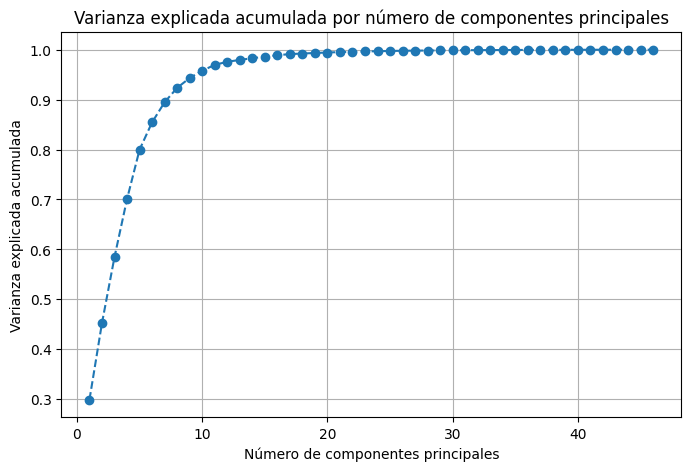

In [77]:
#Calcular la varianza explicada acumulada

data_2=data.drop('labels', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_24544\2234185586.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


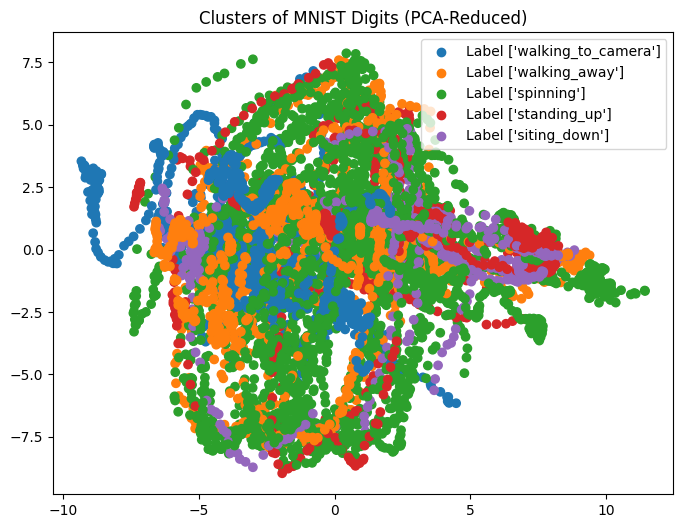

In [78]:
labels = data['labels']

data_2=data.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=8)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()


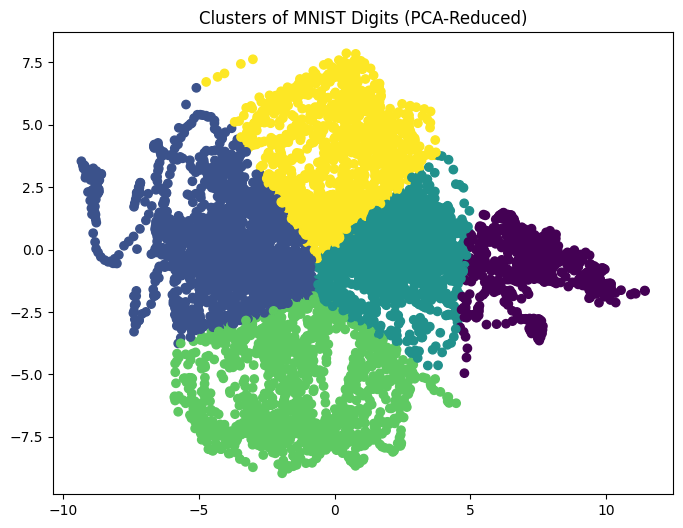

In [79]:
labels = data['labels']

data_2=data.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0,n_init=2)  # 10 clusters for 10 digits
cluster_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced)")
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_24544\377130084.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)


Text(0, 0.5, 't-SNE 2')

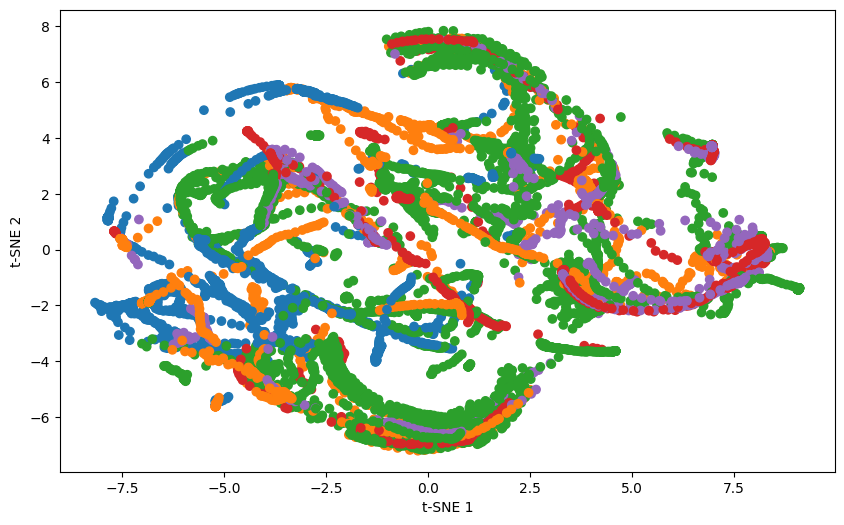

In [80]:
tsne = TSNE(n_components=2, perplexity=500, learning_rate=1, init='pca')
tsne_features = tsne.fit_transform(X)

# Plot the TSNE results without label
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

In [45]:
result_data = []

df = data.copy()
labels = df['labels'].to_numpy()
results_bundle = deque(maxlen=5)
df = df.drop(columns=['labels'])
ardf = df.to_numpy()
result_array = []
for frame in range(len(ardf)):
    if len(results_bundle) == 5:
        new_row = np.array([])
        labels_row = np.array([])
        for n in results_bundle:
            new_row = np.append(new_row, n)
            labels_row = np.append(labels_row, labels[frame])
        if len(np.unique(labels_row)) == 1:
            new_row = np.append(new_row, labels_row[0])
            result_array.append(new_row)

        results_bundle.popleft()
    results_bundle.append(ardf[frame])

    
    
result_df = pd.DataFrame(result_array)

result_df

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
0,0.5043125152587891,0.3745996356010437,-0.1616305261850357,0.9999620914459229,0.5297317504882812,0.4414572119712829,-0.0759953036904335,0.99998140335083,0.4761239886283874,0.392510175704956,...,-0.117430955171585,0.5012537837028503,0.6933073997497559,-0.1442933678627014,0.4248298704624176,0.6337550282478333,-0.117827869951725,0.07489588114915423,0.05465427218223057,['walking_to_camera']
1,0.5050994753837585,0.374491810798645,-0.0391868166625499,0.9999513626098632,0.5311768651008606,0.4382223784923553,-0.0109656145796179,0.9999821186065674,0.475839763879776,0.3927798569202423,...,-0.1090380251407623,0.4813781976699829,0.7915501594543457,0.0947197005152702,0.4363197982311249,0.7939728498458862,0.0514071434736251,0.09549576602310346,0.04818239155501645,['walking_to_camera']
2,0.5050673484802246,0.374490737915039,-0.0620638206601142,0.9999499917030334,0.5340287685394287,0.4383862316608429,0.0156893357634544,0.9999811053276062,0.466445654630661,0.3969709873199463,...,-0.1469285786151886,0.4540607333183288,0.7678857445716858,-0.237966701388359,0.4758600890636444,0.7955352067947388,-0.2418113648891449,0.04868909764090143,0.025427284734261493,['walking_to_camera']
3,0.505059540271759,0.3744957149028778,-0.0890323743224144,0.9999040961265564,0.5341129302978516,0.4317994713783264,-0.0255606193095445,0.9999803900718688,0.4701001942157745,0.3967203795909881,...,-0.0553432255983352,0.4480305314064026,0.7924901247024536,-0.1411072611808776,0.4853658080101013,0.8091349005699158,-0.1768442839384079,0.1084196071154465,0.05912353307780406,['walking_to_camera']
4,0.5050492882728577,0.3744476437568664,-0.1031782999634742,0.9998943209648132,0.5339280366897583,0.4298195540904999,-0.0423076823353767,0.9999808669090272,0.4704510867595672,0.3966580927371979,...,-0.0914876535534858,0.4476251900196075,0.7834483981132507,-0.1717757880687713,0.4981373846530914,0.8045826554298401,-0.1920829713344574,0.1135425071290856,0.06416680353606778,['walking_to_camera']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11345,0.5210421085357666,0.2200913876295089,-0.5859507918357849,0.9999472498893738,0.6005679368972778,0.2824977040290832,-0.2525377571582794,0.999954879283905,0.4224271774291992,0.281998872756958,...,-0.0024638595059514,0.5290899872779846,0.6362664699554443,0.4309174716472626,0.4656723737716675,0.6450060606002808,0.3815552890300751,0.18958056606350468,0.10809967034836522,['walking_to_camera']
11346,0.5215017795562744,0.2176776379346847,-0.5828167796134949,0.9999490976333618,0.6032591462135315,0.2817156314849853,-0.2501600086688995,0.9999549388885498,0.4228720963001251,0.2810228168964386,...,-0.0086575914174318,0.529087245464325,0.636709988117218,0.47062948346138,0.4607113301753998,0.6591584086418152,0.3452486991882324,0.1901445408868038,0.10905184516054005,['walking_to_camera']
11347,0.5216148495674133,0.2165729701519012,-0.5897735357284546,0.9999526739120485,0.6054222583770752,0.280521959066391,-0.2574731409549713,0.9999557733535768,0.4228459596633911,0.2804141938686371,...,-0.0269522406160831,0.5439627766609192,0.8352859616279602,0.4869101941585541,0.4647155404090881,0.8423753976821899,0.3314858078956604,0.2984509272468458,0.16664331380987094,['walking_to_camera']
11348,0.5218336582183838,0.2157724201679229,-0.5764955878257751,0.9999562501907348,0.6065537333488464,0.2796999812126159,-0.2451165169477462,0.9999569058418274,0.422964483499527,0.2800687253475189,...,-0.0299529191106557,0.5437849760055542,0.8353719115257263,0.4646838009357452,0.4647287130355835,0.8419944047927856,0.3319416344165802,0.29842982637686327,0.16630320687529843,['walking_to_camera']


In [46]:
data.columns

Index(['landmark_0_x', 'landmark_0_y', 'landmark_0_z', 'landmark_0_vis',
       'landmark_11_x', 'landmark_11_y', 'landmark_11_z', 'landmark_11_vis',
       'landmark_12_x', 'landmark_12_y', 'landmark_12_z', 'landmark_12_vis',
       'landmark_13_x', 'landmark_13_y', 'landmark_13_z', 'landmark_14_x',
       'landmark_14_y', 'landmark_14_z', 'landmark_15_x', 'landmark_15_y',
       'landmark_15_z', 'landmark_16_x', 'landmark_16_y', 'landmark_16_z',
       'landmark_23_x', 'landmark_23_y', 'landmark_23_z', 'landmark_23_vis',
       'landmark_24_x', 'landmark_24_y', 'landmark_24_z', 'landmark_24_vis',
       'landmark_25_x', 'landmark_25_y', 'landmark_25_z', 'landmark_26_x',
       'landmark_26_y', 'landmark_26_z', 'landmark_27_x', 'landmark_27_y',
       'landmark_27_z', 'landmark_28_x', 'landmark_28_y', 'landmark_28_z',
       'labels', 'distance_soulders', 'hipsDistance'],
      dtype='object')

In [47]:
# Cast all but the last column to float64
for n in range(len(result_df.columns) - 1):
    result_df[n] = result_df[n].astype('float64')

# Verify the changes
print(result_df.dtypes)

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
226    float64
227    float64
228    float64
229    float64
230     object
Length: 231, dtype: object


In [48]:
def calculate_apendix_speed(positions):
    """
    Calculate the speed of the legs given 5 positions, each with 3 dimensions.

    Parameters:
    leg_positions (list of lists): A list containing 5 positions, each with 3 dimensions [x, y, z].

    Returns:
    list: A list containing the speed between each consecutive position.
    """
    speeds = []
    for i in range(1, len(positions)):
        # Calculate the Euclidean distance between consecutive positions
        distance = (positions[i-1] - positions[i])
        # Assuming the time interval between each position is 1 unit
        speed = distance / 1  # Replace 1 with the actual time interval if different
        speeds.append(speed)
    avg_speed = sum(speeds) / len(speeds)
    return avg_speed

nose_positions_y = [
    result_df[1],
    result_df[47],
    result_df[93],
    result_df[139],
    result_df[185]
]

nose_positions_z = [
    result_df[2],
    result_df[48],
    result_df[94],
    result_df[140],
    result_df[186]
]

nose_delta_y = calculate_apendix_speed(nose_positions_y)
nose_delta_z = calculate_apendix_speed(nose_positions_z)

result_df['nose_delta_y'] = nose_delta_y
result_df['nose_delta_z'] = nose_delta_z

# Example usage
left_shoulder_positions_z = [
    result_df[6],
    result_df[52],
    result_df[98],
    result_df[144],
    result_df[190]
]

right_shoulder_positions_z = [
    result_df[10],
    result_df[56],
    result_df[102],
    result_df[148],
    result_df[194]
    ]
left_hip_positions_z = [
    result_df[26],
    result_df[72],
    result_df[118],
    result_df[164],
    result_df[210]
]

right_hip_positions_z = [
    result_df[30],
    result_df[76],
    result_df[122],
    result_df[168],
    result_df[214]
]

left_leg_positions_z = [
    result_df[34],
    result_df[80],
    result_df[126],
    result_df[172],
    result_df[218]
]

right_leg_positions_z = [
    result_df[37],
    result_df[83],
    result_df[129],
    result_df[175],
    result_df[221]
]

left_foot_positions_z = [
    result_df[40],
    result_df[86],
    result_df[132],
    result_df[178],
    result_df[224]
]

right_foot_positions_z = [
    result_df[43],
    result_df[89],
    result_df[135],
    result_df[181],
    result_df[227]
]

left_arm_positions_z = [
    result_df[14],
    result_df[60],
    result_df[106],
    result_df[152],
    result_df[198]
]

right_arm_positions_z = [
    result_df[17],
    result_df[63],
    result_df[109],
    result_df[155],
    result_df[201]
    ]

left_hand_positions_z = [
    result_df[20],
    result_df[66],
    result_df[112],
    result_df[158],
    result_df[204]
]

right_hand_positions_z = [
    result_df[23],
    result_df[69],
    result_df[115],
    result_df[161],
    result_df[207]
    ] 



left_shoulder_delta_z = calculate_apendix_speed(left_shoulder_positions_z)
right_shoulder_delta_z = calculate_apendix_speed(right_shoulder_positions_z)
left_hip_delta_z = calculate_apendix_speed(left_hip_positions_z)
right_hip_delta_z = calculate_apendix_speed(right_hip_positions_z)
left_leg_delta_z = calculate_apendix_speed(left_leg_positions_z)
right_leg_delta_z = calculate_apendix_speed(right_leg_positions_z)
left_foot_delta_z = calculate_apendix_speed(left_foot_positions_z)
right_foot_delta_z = calculate_apendix_speed(right_foot_positions_z)
left_arm_delta_z = calculate_apendix_speed(left_arm_positions_z)
right_arm_delta_z = calculate_apendix_speed(right_arm_positions_z)
left_hand_delta_z = calculate_apendix_speed(left_hand_positions_z)
right_hand_delta_z = calculate_apendix_speed(right_hand_positions_z)


left_shoulder_positions_y = [
    result_df[5],
    result_df[51],
    result_df[97],
    result_df[143],
    result_df[189]
]

right_shoulder_positions_y = [
    result_df[9],
    result_df[55],
    result_df[101],
    result_df[147],
    result_df[193]
    ]

left_arm_positions_y = [
    result_df[13],
    result_df[59],
    result_df[105],
    result_df[151],
    result_df[197]
]

right_arm_positions_y = [
    result_df[16],
    result_df[62],
    result_df[108],
    result_df[154],
    result_df[200]
    ]

left_hand_positions_z = [
    result_df[19],
    result_df[65],
    result_df[111],
    result_df[157],
    result_df[203]
]

right_hand_positions_z = [
    result_df[22],
    result_df[68],
    result_df[114],
    result_df[160],
    result_df[206]
    ] 

left_shoulder_delta_y = calculate_apendix_speed(left_shoulder_positions_y)
right_shoulder_delta_y = calculate_apendix_speed(right_shoulder_positions_y)
left_arm_delta_y = calculate_apendix_speed(left_arm_positions_y)
right_arm_delta_y = calculate_apendix_speed(right_arm_positions_y)
left_hand_delta_y = calculate_apendix_speed(left_hand_positions_z)
right_hand_delta_y = calculate_apendix_speed(right_hand_positions_z)
"""
left_shoulder_positions_x = [
    result_df[4],
    result_df[50],
    result_df[96],
    result_df[142],
    result_df[188]
]
right_shoulder_positions_x = [
    result_df[8],
    result_df[54],
    result_df[100],
    result_df[146],
    result_df[192]
    ]
left_hip_positions_x = [
    result_df[24],
    result_df[70],
    result_df[116],
    result_df[162],
    result_df[208]
]

right_hip_positions_x = [
    result_df[28],
    result_df[74],
    result_df[120],
    result_df[166],
    result_df[212]
]


left_leg_positions_x = [
    result_df[32],
    result_df[78],
    result_df[124],
    result_df[170],
    result_df[216]
]

right_leg_positions_x = [
    result_df[35],
    result_df[81],
    result_df[127],
    result_df[173],
    result_df[219]
]

left_foot_positions_x = [
    result_df[38],
    result_df[84],
    result_df[130],
    result_df[176],
    result_df[222]
]

right_foot_positions_x = [
    result_df[41],
    result_df[87],
    result_df[133],
    result_df[179],
    result_df[225]
]

left_arm_positions_x = [
    result_df[12],
    result_df[58],
    result_df[104],
    result_df[150],
    result_df[196]
]

right_arm_positions_x = [
    result_df[15],
    result_df[61],
    result_df[107],
    result_df[153],
    result_df[199]
    ]

left_hand_positions_x = [
    result_df[18],
    result_df[64],
    result_df[110],
    result_df[156],
    result_df[202]
]

right_hand_positions_x = [
    result_df[21],
    result_df[67],
    result_df[113],
    result_df[159],
    result_df[205]
    ] 

left_shoulder_delta_x = calculate_apendix_speed(left_shoulder_positions_x)
right_shoulder_delta_x = calculate_apendix_speed(right_shoulder_positions_x)
left_hip_delta_x = calculate_apendix_speed(left_hip_positions_x)
right_hip_delta_x = calculate_apendix_speed(right_hip_positions_x)
left_leg_delta_x = calculate_apendix_speed(left_leg_positions_x)
right_leg_delta_x = calculate_apendix_speed(right_leg_positions_x)
left_foot_delta_x = calculate_apendix_speed(left_foot_positions_x)
right_foot_delta_x = calculate_apendix_speed(right_foot_positions_x)
left_arm_delta_x = calculate_apendix_speed(left_arm_positions_x)
right_arm_delta_x = calculate_apendix_speed(right_arm_positions_x)
left_hand_delta_x = calculate_apendix_speed(left_hand_positions_x)
right_hand_delta_x = calculate_apendix_speed(right_hand_positions_x)

result_df['left_shoulder_delta_x'] = left_shoulder_delta_x
result_df['right_shoulder_delta_x'] = right_shoulder_delta_x
result_df['left_hip_delta_x'] = left_hip_delta_x
result_df['right_hip_delta_x'] = right_hip_delta_x
result_df['left_leg_delta_x'] = left_leg_delta_x
result_df['right_leg_delta_x'] = right_leg_delta_x
result_df['left_foot_delta_x'] = left_foot_delta_x
result_df['right_foot_delta_x'] = right_foot_delta_x
result_df['left_arm_delta_x'] = left_arm_delta_x
result_df['right_arm_delta_x'] = right_arm_delta_x
result_df['left_hand_delta_x'] = left_hand_delta_x
result_df['right_hand_delta_x'] = right_hand_delta_x
"""
result_df['left_shoulder_delta_z'] = left_shoulder_delta_z
result_df['right_shoulder_delta_z'] = right_shoulder_delta_z
result_df['left_hip_delta_z'] = left_hip_delta_z
result_df['right_hip_delta_z'] = right_hip_delta_z
result_df['left_leg_delta_z'] = left_leg_delta_z
result_df['right_leg_delta_z'] = right_leg_delta_z
result_df['left_foot_delta_z'] = left_foot_delta_z
result_df['right_foot_delta_z'] = right_foot_delta_z
result_df['left_arm_delta_z'] = left_arm_delta_z
result_df['right_arm_delta_z'] = right_arm_delta_z
result_df['left_hand_delta_z'] = left_hand_delta_z
result_df['right_hand_delta_z'] = right_hand_delta_z

result_df['left_shoulder_delta_y'] = left_shoulder_delta_y
result_df['right_shoulder_delta_y'] = right_shoulder_delta_y
result_df['left_arm_delta_y'] = left_arm_delta_y
result_df['right_arm_delta_y'] = right_arm_delta_y
result_df['left_hand_delta_y'] = left_hand_delta_y
result_df['right_hand_delta_y'] = right_hand_delta_y


C:\Users\camic\AppData\Local\Temp\ipykernel_25140\1948433679.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['nose_delta_y'] = nose_delta_y
C:\Users\camic\AppData\Local\Temp\ipykernel_25140\1948433679.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['nose_delta_z'] = nose_delta_z
C:\Users\camic\AppData\Local\Temp\ipykernel_25140\1948433679.py:331: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

In [49]:
np.array(result_array).shape

(11350, 231)

Varianza explicada por cada componente principal:
Componente 1: 0.2090
Componente 2: 0.1370
Componente 3: 0.1151
Componente 4: 0.1075
Componente 5: 0.1008
Componente 6: 0.0773
Componente 7: 0.0521
Componente 8: 0.0431
Componente 9: 0.0269
Componente 10: 0.0235
Componente 11: 0.0170
Componente 12: 0.0155
Componente 13: 0.0113
Componente 14: 0.0066
Componente 15: 0.0062
Componente 16: 0.0059
Componente 17: 0.0054
Componente 18: 0.0048
Componente 19: 0.0044
Componente 20: 0.0037
Componente 21: 0.0030
Componente 22: 0.0023
Componente 23: 0.0023
Componente 24: 0.0022
Componente 25: 0.0018
Componente 26: 0.0017
Componente 27: 0.0014
Componente 28: 0.0014
Componente 29: 0.0012
Componente 30: 0.0010


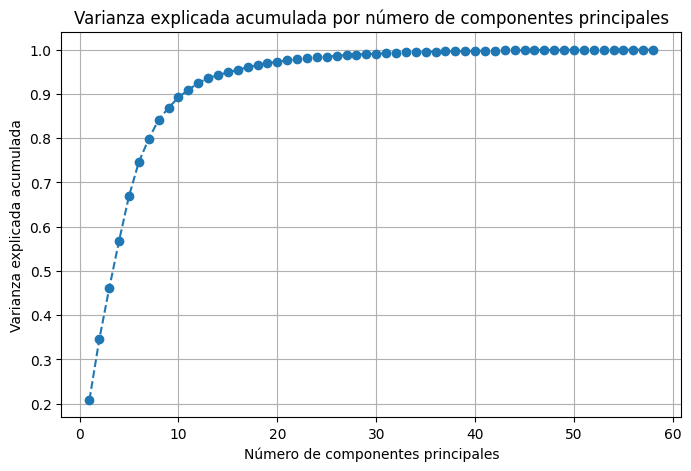

In [53]:
#Calcular la varianza explicada acumulada

data_group=result_df.drop(230, axis=1)
data_group.columns = data_group.columns.astype(str)
X = StandardScaler().fit_transform(data_group)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_24544\641544295.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


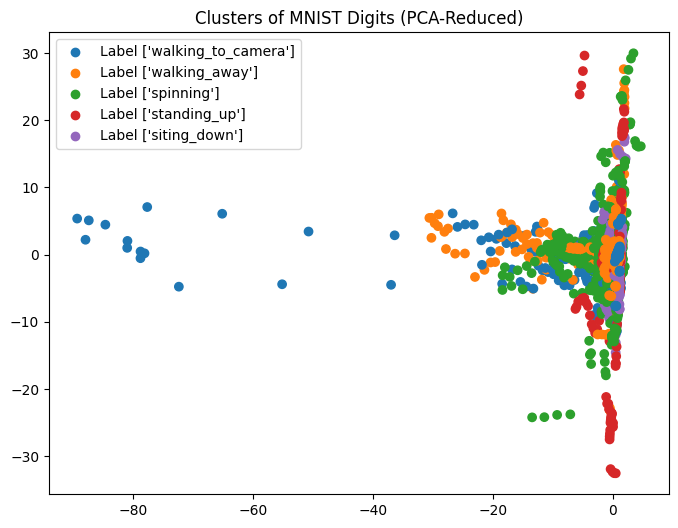

In [54]:
labels = result_df[230]


data_group=result_df.drop(230, axis=1)
data_group.columns = data_group.columns.astype(str)
X = StandardScaler().fit_transform(data_group)

pca = PCA(n_components=29)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()

c:\Users\camic\OneDrive\Documentos\Inteligencia artificial\ProjectIA\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\camic\OneDrive\Documentos\Inteligencia artificial\ProjectIA\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\camic\AppData\Local\Temp\ipykernel_24544\4192807430.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)


Text(0, 0.5, 't-SNE 2')

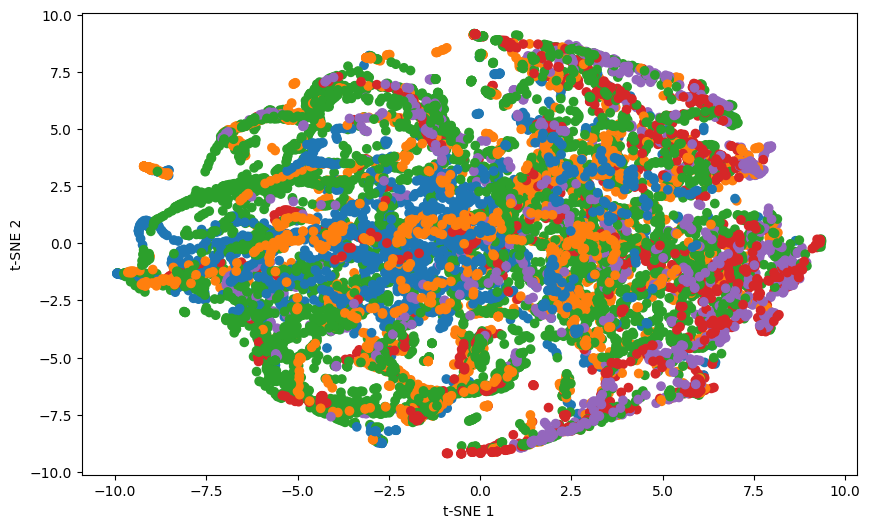

In [ ]:
tsne = TSNE(n_components=2, perplexity=3, learning_rate=1, init='pca')
tsne_features = tsne.fit_transform(X)

# Plot the TSNE results without label
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

In [50]:
result_df.to_csv("datos_procesados.csv")

In [134]:
# Normalize the columns and save the values they were divided by
normalization_factors = {}
for column in result_df.columns:
    if(column == 230):
        continue
    max_value = result_df[column].max()
    if (max_value >1):
        normalization_factors[column] = max_value
        result_df[column] = result_df[column] / max_value
    else:
        normalization_factors[column] = 1
        result_df[column] = result_df[column] / 1

# Save the normalization factors to a CSV file
normalization_factors_df = pd.DataFrame(list(normalization_factors.items()), columns=['Column', 'Normalization Factor'])
normalization_factors_df.to_csv('normalization_factors.csv', index=False)

# Save the normalized dataframe to a CSV file
result_df.to_csv('normalized_result_df.csv', index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transform labels into a numeric variable
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(X, numeric_labels, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)

In [23]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 0.964414646725116

Matriz de Confusión:
 [[170   7   0   0   1]
 [  0 897   2   3   4]
 [  1   5 185   5   4]
 [  0  14   1 319   7]
 [  1  10   2   2 299]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.96      0.99      0.98       906
           2       0.97      0.93      0.95       200
           3       0.97      0.94      0.95       341
           4       0.95      0.95      0.95       314

    accuracy                           0.96      1939
   macro avg       0.97      0.95      0.96      1939
weighted avg       0.96      0.96      0.96      1939

